In [39]:
import pandas as pd
import numpy as np
import spacy
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stpwrds = set(stopwords.words('english'))
stpwrds.discard('not')
stpwrds.discard('no')
import os
import re
from time import time  
from collections import defaultdict  
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import tqdm
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Accent')
import warnings
warnings.filterwarnings('ignore')
import unicodedata
from word2number import w2n
import contractions
from bs4 import BeautifulSoup
from spellchecker import SpellChecker


In [2]:
for dir_path , _ , file_name in os.walk('C:/Users/Ali/Downloads/'):
    for file in file_name:
        print(os.path.join(dir_path , file))

C:/Users/Ali/Downloads/1501254067791_AI-Job-Analysis.jpg
C:/Users/Ali/Downloads/2 salary.png
C:/Users/Ali/Downloads/2nd Year Smart Syllabus Punjab Boards.pdf
C:/Users/Ali/Downloads/4 salary.png
C:/Users/Ali/Downloads/abcnews-date-text.csv.zip
C:/Users/Ali/Downloads/Age roups.png
C:/Users/Ali/Downloads/AI Concepts Slides.pdf
C:/Users/Ali/Downloads/Anaconda3-2020.07-Windows-x86_64.exe
C:/Users/Ali/Downloads/Anaconda3-2020.11-Windows-x86_64.exe
C:/Users/Ali/Downloads/ANN_ready
C:/Users/Ali/Downloads/ANN_ready.csv
C:/Users/Ali/Downloads/apikey.json
C:/Users/Ali/Downloads/Assignment_YYT (1).docx
C:/Users/Ali/Downloads/Assignment_YYT.docx
C:/Users/Ali/Downloads/Automobile Data Cleansing report.docx
C:/Users/Ali/Downloads/Automobile-Cleaned_Data.xlsx
C:/Users/Ali/Downloads/Automobile.csv
C:/Users/Ali/Downloads/Basics of Pandas_bepec.ipynb
C:/Users/Ali/Downloads/beginner.ipynb
C:/Users/Ali/Downloads/better_deep_learning_mini_course.pdf
C:/Users/Ali/Downloads/blockchain-financial-services-digit

In [3]:
df = pd.read_csv('C:/Users/Ali/Downloads/train.csv/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
print(df.shape)
df.info()

(31962, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


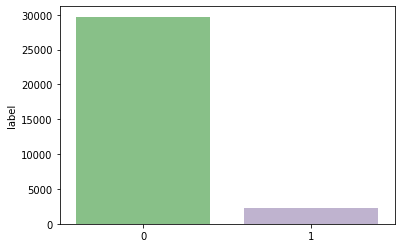

In [29]:
x = df['label'].value_counts()
sns.barplot(x.index , x)
plt.show()

### Basic statistics

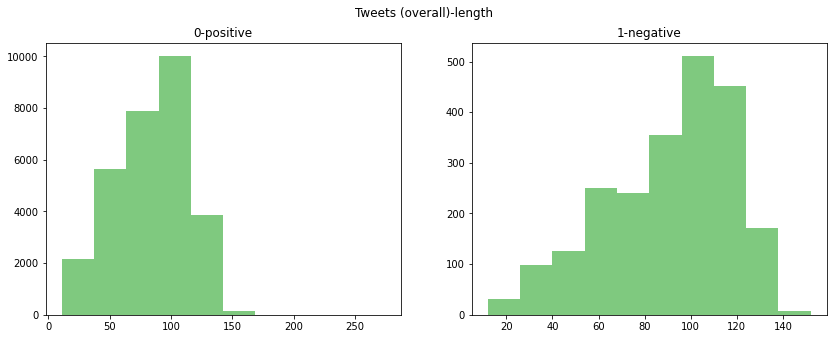

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
tweet_len = df[df['label'] == int(0)]['tweet'].apply(lambda x : len(x))
ax1.hist(tweet_len )
ax1.set_title('0-positive')

tweet_len = df[df['label'] == int(1)]['tweet'].apply(lambda x : len(x))
ax2.hist(tweet_len)
ax2.set_title('1-negative')

fig.suptitle('Tweets (overall)-length')
plt.show()

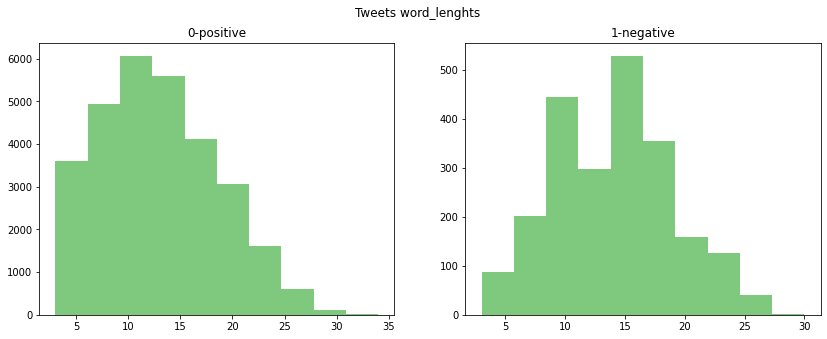

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
tweet_len = df[df['label'] == int(0)]['tweet'].apply(lambda x : x.split()).apply(len)
ax1.hist(tweet_len )
ax1.set_title('0-positive')

tweet_len = df[df['label'] == int(1)]['tweet'].apply(lambda x : x.split()).apply(len)
ax2.hist(tweet_len)
ax2.set_title('1-negative')

fig.suptitle('Tweets word_lenghts')
plt.show()

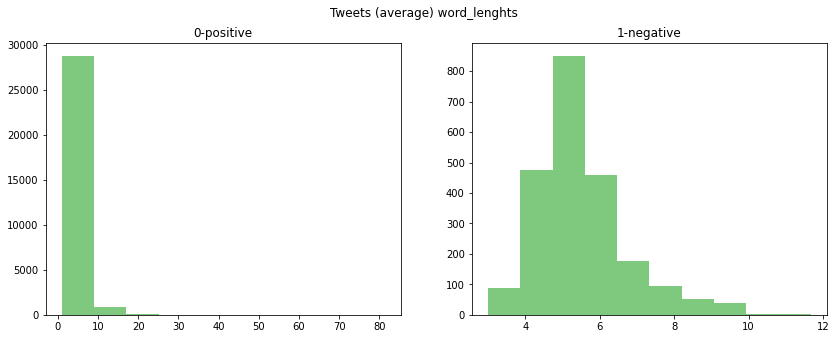

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
tweet_len = df[df['label'] == int(0)]['tweet'].str.split().apply(lambda x : [len(i) for i in x]).apply(lambda x: np.mean(x))
ax1.hist(tweet_len )
ax1.set_title('0-positive')

tweet_len = df[df['label'] == int(1)]['tweet'].str.split().apply(lambda x : [len(i) for i in x]).apply(lambda x: np.mean(x))
ax2.hist(tweet_len)
ax2.set_title('1-negative')

fig.suptitle('Tweets (average) word_lenghts')
plt.show()

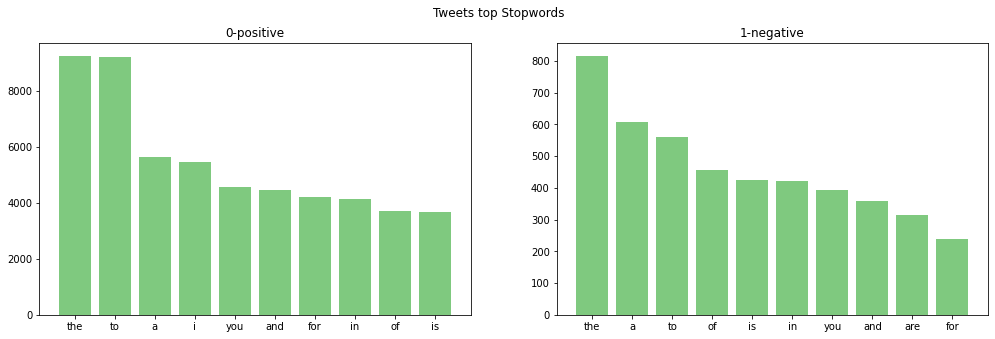

In [33]:
## Visualizing top stopwords in tweets by each label
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(17,5))

corpus = df[df['label'] == int(0)]['tweet'].str.split()
corpus = [word for i in corpus for word in i]
dic = defaultdict(int)
for word in corpus:
    if word in stpwrds:
        dic[word]+=1
top_0 = sorted(dic.items() , key= lambda x: x[1] , reverse=True)[:10]
top_0

corpus = df[df['label'] == int(1)]['tweet'].str.split()
corpus = [word for i in corpus for word in i]
dic = defaultdict(int)
for word in corpus:
    if word in stpwrds:
        dic[word]+=1
top_1 = sorted(dic.items() , key= lambda x: x[1] , reverse=True)[:10]
top_1

words,counts = zip(*top_0)
ax1.bar(words,counts)
ax1.set_title('0-positive')


words,counts = zip(*top_1)
ax2.bar(words,counts)
ax2.set_title('1-negative')
fig.suptitle('Tweets top Stopwords')
plt.show()

In [34]:
df.sample(10)

,id,label,tweet
20752,20753,0,rent me a farm wishes you all a very happy father's day :) #rentmeafarm #wishes #fathersday
18651,18652,1,"#newyearseve #skynews presenter to asian woman in edinburgh: ""what brings you here?"" asian woman: ""i live here."""
6709,6710,0,heaven in a tiny glass ðð #shots #liquor #blueberries #booze
7571,7572,0,@user @user @user @user @user @user @user @user fuck #eng i hope they lose
9968,9969,0,am so in hell right now #
20553,20554,1,opinion: is rife in the #lgbt community. #gay people can't demand equality while discriminating themselves
23525,23526,0,contest day sunrise
17170,17171,0,i am thankful for happiness. #thankful #positive
21154,21155,0,cheers to a lovely weekend. ð¾ #life #summer #instagram #instacool #vsco #vscocam #loveâ¦
11948,11949,0,cannot contain my own face. i am so time to buy 2 tiny pairs of cowboy boots for theâ¦


In [35]:
dum = 'hey this is #Ali day have #fun today'
def hastags(text):
    tags = re.findall(r'#(\w+)', text)
    return tags
hastags(dum)

['Ali', 'fun']

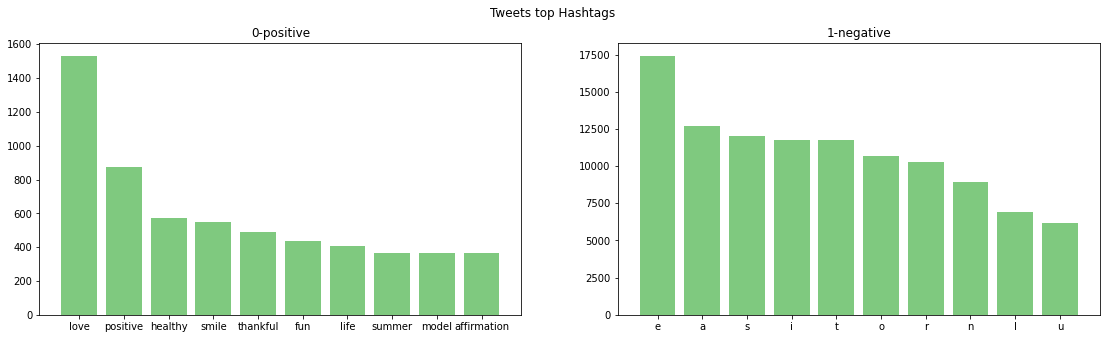

In [36]:
## visualizing top trending hashtags to see the discussion topics on twitter
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(19,5))

data = df[df['label'] == int(0)]['tweet'].apply(lambda x : hastags(x))
data = [word for i in data for word in i]
dic = defaultdict(int)
for word in data:
    dic[word]+=1
top_0 = sorted(dic.items() , key= lambda x: x[1] , reverse=True)[:10]
top_0

data = df[df['label'] == int(1)]['tweet'].apply(lambda x : hastags(x))
data = [word for i in corpus for word in i]
dic = defaultdict(int)
for word in data:
    dic[word]+=1
top_1 = sorted(dic.items() , key= lambda x: x[1] , reverse=True)[:10]
top_1

words,counts = zip(*top_0)
ax1.bar(words,counts)
ax1.set_title('0-positive')


words,counts = zip(*top_1)
ax2.bar(words,counts)
ax2.set_title('1-negative')
fig.suptitle('Tweets top Hashtags')
plt.show()

### Text cleaning 

In [13]:
## For removing URL's
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    text =  url.sub(r'',text)
    return text
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
print("URL removed {}".format(remove_URL(example)))

## For removing HTML tags using beautiful soup
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

## For removing Accented characters
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    #text = unidecode.unidecode(text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

## Expanding contractions
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

## Word to number(optional not much nesseceray)
text = """three cups of coffee to 3 cups of coffee"""
doc = nlp(text)
tokens = [w2n.word_to_num(token.text) if token.pos_ == 'NUM' else token for token in doc]
print(tokens)

## Removing specaill characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

# Extra white spaces
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


URL removed New competition launched :
[3, cups, of, coffee, to, 3, cups, of, coffee]


In [14]:
## Removing Emogis and other pictographs
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text
example = "Hey how are you 😁😂👍🙌💕😜👀✔🎁"
print(remove_emoji(example))

## Spelling correction library ( pip install pyspellchecker)
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
example = "corect me please"
print(correct_spellings(text))

## Lemmatization of text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

## Stopwords removal
def remove_stopwords(text, is_lower_case=False):
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token.lower() not in stpwrds]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stpwrds]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

Hey how are you 
three cups of coffee to 3 cups of coffee


In [15]:
def normalize_doc(doc, URL_stripping=True, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True , emoji_removal=True,
                     spelling_correction = True):
    normalized_document = []
    # Stip URL's
    if URL_stripping:
        doc = remove_URL(doc)
    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)
    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)
    # expand contractions    
    if contraction_expansion:
        doc = expand_contractions(doc)
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    # remove special characters    
    if special_char_removal:
        doc = remove_special_characters(doc)
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    # remove emogis
    if emoji_removal:
        doc = remove_emoji(doc)
    # spelling_correction
    if spelling_correction:
        doc = correct_spellings(doc)
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
    normalized_document.append(doc)
    return doc

In [16]:
example = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 😜✔👏
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, #Natural @Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waitng forhttps://? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
normalize_doc(example)

'hello hello hear hear python amazing language use scripting web development information retrieval natural language processing machine learn artificial intelligence waitng go get start learn learn already get headstart'

# Note :-
               Do not try to run entire function above on data , it will take much time for me it took >4hrs but still 
               running
               So I decided to apply cleaning in parts by using only 2 sub-functions at a time.

In [17]:
t = time()
df['Clean_tweets'] = df['tweet'].apply(remove_URL)
df['Clean_tweets'] = df['Clean_tweets'].apply(strip_html_tags)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))
df.sample(5)

Total time taken to run : 0.08 mins


,id,label,tweet,Clean_tweets
17914,17915,0,âthe truth is rarely pure and never simple.â #friend #friends #fun #funny #love #instagood #friendship #pay #chill #cute #photooftâ¦,âthe truth is rarely pure and never simple.â #friend #friends #fun #funny #love #instagood #friendship #pay #chill #cute #photooftâ¦
9694,9695,0,wales vs england is a staer before the real game - poland vs germany #pol,wales vs england is a staer before the real game - poland vs germany #pol
25785,25786,0,making big koves !,making big koves !
22932,22933,0,@user @user @user @user i am super ðð»ð,@user @user @user @user i am super ðð»ð
29674,29675,0,"i've just landed not one, but two new television roles for @user in the same day! ð ð¥thankyou universe ðð½ #actor #tv #blessed","i've just landed not one, but two new television roles for @user in the same day! ð ð¥thankyou universe ðð½ #actor #tv #blessed"


In [18]:
t = time()
df['Clean_tweets'] = df['Clean_tweets'].apply(remove_special_characters)
df['Clean_tweets'] = df['Clean_tweets'].apply(remove_whitespace)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))
df.sample(5)

Total time taken to run : 0.01 mins


,id,label,tweet,Clean_tweets
26710,26711,0,"you enjoy creating your strawmen, @user then delight in mowing them down, like mateen. @user",you enjoy creating your strawmen user then delight in mowing them down like mateen user
110,111,0,sunday...ð #weekend #relax #icon #woman #sundaymorning #sunday #marilynmonroe,sunday weekend relax icon woman sundaymorning sunday marilynmonroe
18393,18394,0,reading my manuscript and not wanting to stop. . good evening and good night. ð´,reading my manuscript and not wanting to stop good evening and good night
17913,17914,0,cheese and crackers for dinner amp,cheese and crackers for dinner amp
17749,17750,1,@user hidden in #america is as rampant as blatant racism. @user @user @user @user,user hidden in america is as rampant as blatant racism user user user user


In [19]:
t = time()
df['Clean_tweets'] = df['Clean_tweets'].apply(remove_emoji)
df['Clean_tweets'] = df['Clean_tweets'].apply(remove_stopwords)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))

df.head()

Total time taken to run : 0.11 mins


,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drags kids dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [20]:
def small_fun(doc):
    doc = doc.lower()
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    return doc
t = time()
df['Clean_tweets'] = df['Clean_tweets'].apply(small_fun)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))

df.head()

Total time taken to run : 0.01 mins


,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drags kids dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [21]:
t = time()
df['Clean_tweets'] = df['Clean_tweets'].apply(remove_accented_chars)
df['Clean_tweets'] = df['Clean_tweets'].apply(expand_contractions)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))

df.head()

Total time taken to run : 0.01 mins


,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drags kids dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks lyft credit can not use because do not offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love you take you time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [49]:
## It would take much time , I'll be tracking the overall progress by taking 50 records at a time.
i = 0
j = 50
t = time()
for k in range(len(df)):
        if i < 31950:
            print("We are at [{}:{}] loc and {}th iteration of total 638 epochs , time spent {} secs ... \
            ".format(i,j,k,np.round((time()-t))))
            df['Clean_tweets'][i:j] = df['Clean_tweets'][i:j].apply(lemmatize_text)
            df['Clean_tweets'][i:j] = df['Clean_tweets'][i:j].apply(correct_spellings)
            
        else:
            print("Last iteration !!!!!")
            df['Clean_tweets'][i:] = df['Clean_tweets'][i:].apply(lemmatize_text)
            df['Clean_tweets'][i:] = df['Clean_tweets'][i:].apply(correct_spellings)
            break
        i+=50
        j+=50
        
df.head()

We are at [0:50] loc and 0th iteration of total 638 epochs , time spent 0.0 secs ...             
We are at [50:100] loc and 1th iteration of total 638 epochs , time spent 37.0 secs ...             
We are at [100:150] loc and 2th iteration of total 638 epochs , time spent 64.0 secs ...             
We are at [150:200] loc and 3th iteration of total 638 epochs , time spent 99.0 secs ...             
We are at [200:250] loc and 4th iteration of total 638 epochs , time spent 124.0 secs ...             
We are at [250:300] loc and 5th iteration of total 638 epochs , time spent 147.0 secs ...             
We are at [300:350] loc and 6th iteration of total 638 epochs , time spent 181.0 secs ...             
We are at [350:400] loc and 7th iteration of total 638 epochs , time spent 209.0 secs ...             
We are at [400:450] loc and 8th iteration of total 638 epochs , time spent 231.0 secs ...             
We are at [450:500] loc and 9th iteration of total 638 epochs , time spent 256.0 s

We are at [3900:3950] loc and 78th iteration of total 638 epochs , time spent 2441.0 secs ...             
We are at [3950:4000] loc and 79th iteration of total 638 epochs , time spent 2477.0 secs ...             
We are at [4000:4050] loc and 80th iteration of total 638 epochs , time spent 2511.0 secs ...             
We are at [4050:4100] loc and 81th iteration of total 638 epochs , time spent 2543.0 secs ...             
We are at [4100:4150] loc and 82th iteration of total 638 epochs , time spent 2574.0 secs ...             
We are at [4150:4200] loc and 83th iteration of total 638 epochs , time spent 2598.0 secs ...             
We are at [4200:4250] loc and 84th iteration of total 638 epochs , time spent 2629.0 secs ...             
We are at [4250:4300] loc and 85th iteration of total 638 epochs , time spent 2662.0 secs ...             
We are at [4300:4350] loc and 86th iteration of total 638 epochs , time spent 2690.0 secs ...             
We are at [4350:4400] loc and 87th it

We are at [7750:7800] loc and 155th iteration of total 638 epochs , time spent 4851.0 secs ...             
We are at [7800:7850] loc and 156th iteration of total 638 epochs , time spent 4884.0 secs ...             
We are at [7850:7900] loc and 157th iteration of total 638 epochs , time spent 4919.0 secs ...             
We are at [7900:7950] loc and 158th iteration of total 638 epochs , time spent 4954.0 secs ...             
We are at [7950:8000] loc and 159th iteration of total 638 epochs , time spent 4969.0 secs ...             
We are at [8000:8050] loc and 160th iteration of total 638 epochs , time spent 5008.0 secs ...             
We are at [8050:8100] loc and 161th iteration of total 638 epochs , time spent 5030.0 secs ...             
We are at [8100:8150] loc and 162th iteration of total 638 epochs , time spent 5067.0 secs ...             
We are at [8150:8200] loc and 163th iteration of total 638 epochs , time spent 5093.0 secs ...             
We are at [8200:8250] loc an

We are at [11550:11600] loc and 231th iteration of total 638 epochs , time spent 7349.0 secs ...             
We are at [11600:11650] loc and 232th iteration of total 638 epochs , time spent 7379.0 secs ...             
We are at [11650:11700] loc and 233th iteration of total 638 epochs , time spent 7406.0 secs ...             
We are at [11700:11750] loc and 234th iteration of total 638 epochs , time spent 7450.0 secs ...             
We are at [11750:11800] loc and 235th iteration of total 638 epochs , time spent 7484.0 secs ...             
We are at [11800:11850] loc and 236th iteration of total 638 epochs , time spent 7515.0 secs ...             
We are at [11850:11900] loc and 237th iteration of total 638 epochs , time spent 7579.0 secs ...             
We are at [11900:11950] loc and 238th iteration of total 638 epochs , time spent 7613.0 secs ...             
We are at [11950:12000] loc and 239th iteration of total 638 epochs , time spent 7686.0 secs ...             
We are at 

We are at [15300:15350] loc and 306th iteration of total 638 epochs , time spent 9951.0 secs ...             
We are at [15350:15400] loc and 307th iteration of total 638 epochs , time spent 9982.0 secs ...             
We are at [15400:15450] loc and 308th iteration of total 638 epochs , time spent 10016.0 secs ...             
We are at [15450:15500] loc and 309th iteration of total 638 epochs , time spent 10041.0 secs ...             
We are at [15500:15550] loc and 310th iteration of total 638 epochs , time spent 10085.0 secs ...             
We are at [15550:15600] loc and 311th iteration of total 638 epochs , time spent 10115.0 secs ...             
We are at [15600:15650] loc and 312th iteration of total 638 epochs , time spent 10138.0 secs ...             
We are at [15650:15700] loc and 313th iteration of total 638 epochs , time spent 10165.0 secs ...             
We are at [15700:15750] loc and 314th iteration of total 638 epochs , time spent 10196.0 secs ...             
We 

We are at [19000:19050] loc and 380th iteration of total 638 epochs , time spent 12179.0 secs ...             
We are at [19050:19100] loc and 381th iteration of total 638 epochs , time spent 12216.0 secs ...             
We are at [19100:19150] loc and 382th iteration of total 638 epochs , time spent 12242.0 secs ...             
We are at [19150:19200] loc and 383th iteration of total 638 epochs , time spent 12267.0 secs ...             
We are at [19200:19250] loc and 384th iteration of total 638 epochs , time spent 12302.0 secs ...             
We are at [19250:19300] loc and 385th iteration of total 638 epochs , time spent 12326.0 secs ...             
We are at [19300:19350] loc and 386th iteration of total 638 epochs , time spent 12359.0 secs ...             
We are at [19350:19400] loc and 387th iteration of total 638 epochs , time spent 12388.0 secs ...             
We are at [19400:19450] loc and 388th iteration of total 638 epochs , time spent 12421.0 secs ...             
W

We are at [22700:22750] loc and 454th iteration of total 638 epochs , time spent 14419.0 secs ...             
We are at [22750:22800] loc and 455th iteration of total 638 epochs , time spent 14458.0 secs ...             
We are at [22800:22850] loc and 456th iteration of total 638 epochs , time spent 14500.0 secs ...             
We are at [22850:22900] loc and 457th iteration of total 638 epochs , time spent 14534.0 secs ...             
We are at [22900:22950] loc and 458th iteration of total 638 epochs , time spent 14573.0 secs ...             
We are at [22950:23000] loc and 459th iteration of total 638 epochs , time spent 14612.0 secs ...             
We are at [23000:23050] loc and 460th iteration of total 638 epochs , time spent 14645.0 secs ...             
We are at [23050:23100] loc and 461th iteration of total 638 epochs , time spent 14666.0 secs ...             
We are at [23100:23150] loc and 462th iteration of total 638 epochs , time spent 14711.0 secs ...             
W

We are at [26400:26450] loc and 528th iteration of total 638 epochs , time spent 16721.0 secs ...             
We are at [26450:26500] loc and 529th iteration of total 638 epochs , time spent 16746.0 secs ...             
We are at [26500:26550] loc and 530th iteration of total 638 epochs , time spent 16792.0 secs ...             
We are at [26550:26600] loc and 531th iteration of total 638 epochs , time spent 16819.0 secs ...             
We are at [26600:26650] loc and 532th iteration of total 638 epochs , time spent 16842.0 secs ...             
We are at [26650:26700] loc and 533th iteration of total 638 epochs , time spent 16867.0 secs ...             
We are at [26700:26750] loc and 534th iteration of total 638 epochs , time spent 16895.0 secs ...             
We are at [26750:26800] loc and 535th iteration of total 638 epochs , time spent 16925.0 secs ...             
We are at [26800:26850] loc and 536th iteration of total 638 epochs , time spent 16959.0 secs ...             
W

We are at [30100:30150] loc and 602th iteration of total 638 epochs , time spent 19860.0 secs ...             
We are at [30150:30200] loc and 603th iteration of total 638 epochs , time spent 19886.0 secs ...             
We are at [30200:30250] loc and 604th iteration of total 638 epochs , time spent 19916.0 secs ...             
We are at [30250:30300] loc and 605th iteration of total 638 epochs , time spent 19938.0 secs ...             
We are at [30300:30350] loc and 606th iteration of total 638 epochs , time spent 19978.0 secs ...             
We are at [30350:30400] loc and 607th iteration of total 638 epochs , time spent 20003.0 secs ...             
We are at [30400:30450] loc and 608th iteration of total 638 epochs , time spent 20029.0 secs ...             
We are at [30450:30500] loc and 609th iteration of total 638 epochs , time spent 20056.0 secs ...             
We are at [30500:30550] loc and 610th iteration of total 638 epochs , time spent 20088.0 secs ...             
W

,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thank leave credit can not use because do not offer wheelchair van pox disappoint getthanke
2,3,0,bihday your majesty,bithday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love you take you time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [46]:
from time import sleep
i = 0
j = 50
t = time()
print(t)
for k in range(len(df)):
        if i < 31950:
            print("[{}:{}] time {} secs".format(i,j,np.round((time()-t))))
            print(k)
            sleep(1)
        else:
            print("[{}:]".format(i))
            break
        i+=50
        j+=50
        

1617774770.690535
[0:50] time 0.0 secs
0
[50:100] time 1.0 secs
1
[100:150] time 2.0 secs
2
[150:200] time 3.0 secs
3
[200:250] time 4.0 secs
4
[250:300] time 5.0 secs
5
[300:350] time 6.0 secs
6
[350:400] time 7.0 secs
7
[400:450] time 8.0 secs
8
[450:500] time 9.0 secs
9
[500:550] time 10.0 secs
10
[550:600] time 11.0 secs
11
[600:650] time 12.0 secs
12
[650:700] time 13.0 secs
13


KeyboardInterrupt: 

In [39]:
df.shape

(31962, 4)

### Pickling

In [50]:
if not os.path.exists(os.path.join("C:/Users/Ali/Downloads/train.csv", "processed_data")):
    os.makedirs(os.path.join("C:/Users/Ali/Downloads/train.csv", "processed_data"))

In [37]:
PICKLE_TRAIN_DIR = os.path.join("C:/Users/Ali/Downloads/train.csv", "processed_data", "train.pkl")

In [52]:
pd.to_pickle(df, PICKLE_TRAIN_DIR)


In [38]:
del(df)
train = pd.read_pickle(PICKLE_TRAIN_DIR)
train.head()

,id,label,tweet,Clean_tweets
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thank leave credit can not use because do not offer wheelchair van pox disappoint getthanke
2,3,0,bihday your majesty,bithday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model love you take you time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


### Using Pre-traing GloVe model to get vectors for our Data

In [41]:
GLOVE_DIR = 'C:/Users/Ali/Downloads/glove.6B_2'
print("indexing words....")
glove_input_file = 'glove.6B.100d.txt'

f = open(os.path.join(GLOVE_DIR , glove_input_file),encoding='utf8')
embedding_index = {}
for line in f:
    values = line.split()
    word = values[0]
    ceof = np.asarray(values[1:] , dtype = 'float32')
    embedding_index[word] = ceof
f.close()

indexing words....


In [42]:
## shuffling and splitting data to provide equal average of labels accross train and test sets.

from sklearn.model_selection import StratifiedShuffleSplit

X = train['Clean_tweets']
y = train['label']
print(X.shape)
print(y.shape)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss.get_n_splits(X, y))
print(sss)

train_idx = 0
test_idx = 0
for train_idx , test_idx in sss.split(X,y):
    X_train  , X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train  , y_test = y.iloc[train_idx], y.iloc[test_idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

(31962,)
(31962,)
1
StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)
(28765,)
(3197,)
(28765,)
(3197,)
0    29720
1     2242
Name: label, dtype: int64
0    26747
1     2018
Name: label, dtype: int64
0    2973
1     224
Name: label, dtype: int64


In [47]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df):
        words=[word for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus
corpus = create_corpus(X_train)
print(len(corpus))
corpus

100%|██████████████████████████████████████████████████████████████████████████| 28765/28765 [00:05<00:00, 5509.27it/s]


28765


[['guy',
  'I',
  'have',
  'never',
  'stay',
  'nice',
  'hotel',
  'feel',
  'oooooh',
  'downtown',
  'nashville',
  'gouda',
  'get',
  'tonight'],
 ['first',
  'angry',
  'bird',
  'collection',
  'bird',
  'birdman',
  'crochethandmade',
  'crochet'],
 ['model', 'love', 'you', 'take', 'you', 'time', 'ur'],
 ['relaxationinshot',
  'girl',
  'cute',
  'summer',
  'blur',
  'sun',
  'fun',
  'dog',
  'hair',
  'beach',
  'hot',
  'cool'],
 ['join', 'we'],
 ['user',
  '3',
  '3',
  'listen',
  'beautiful',
  'good',
  'friend',
  'user',
  'singe',
  'amazing',
  'voice',
  '3',
  '3',
  '3',
  '3',
  '2'],
 ['can', 'not', 'see', 'friend', 'be', 'I', 'be', 'sick'],
 ['strange',
  'way',
  'show',
  'love',
  'sugar',
  'must',
  'something',
  'really',
  'special',
  'parenthood',
  'way',
  'go',
  'thai',
  'gourmet'],
 ['finally',
  'get',
  'fish',
  'tank',
  'saltwateank',
  'angelfish',
  'lovemylittlefish',
  'nottingham'],
 ['another',
  'example',
  'religiouspsychosis',


In [55]:
embedding_index['tonight']

array([-0.24465 , -0.092613,  1.0671  , -0.66962 , -0.64782 ,  0.20258 ,
        0.4107  ,  0.74288 , -0.71554 , -0.76655 ,  0.36399 ,  0.13409 ,
       -0.27172 , -0.29516 ,  0.020104, -0.48878 , -0.073896,  0.31144 ,
       -0.40741 ,  0.43359 , -0.014262, -0.16184 , -1.0308  , -0.1887  ,
        0.75861 ,  0.51352 ,  0.56633 ,  0.4409  ,  0.69207 ,  0.11421 ,
       -0.46968 ,  0.57933 ,  0.63327 ,  0.31022 ,  0.18975 ,  0.11376 ,
       -0.43695 , -0.33308 , -0.14404 , -0.81116 ,  0.4437  ,  0.20911 ,
       -0.32548 ,  0.23921 , -0.48501 , -0.55891 , -0.46711 , -0.43787 ,
        0.020688, -1.177   , -0.4912  , -0.45587 ,  0.32062 ,  0.23475 ,
       -0.12543 , -1.9418  ,  0.11463 ,  0.32385 ,  0.64065 ,  0.55616 ,
       -1.2211  ,  1.138   , -0.94455 , -0.82848 ,  0.27383 ,  0.016708,
        0.33439 ,  0.21885 , -0.67734 ,  0.14202 ,  0.17444 , -0.64067 ,
        0.024292, -0.047356,  0.81358 ,  0.36087 , -0.27052 ,  0.0777  ,
       -0.06213 ,  0.11509 , -0.49709 , -0.31167 , 

In [56]:
## Just practice
l1 = ['car','bike','cycle']
dict2 = {'car':100,'bike':50,'plane':500}
l2 = []
for word in l1:
        try:
            l2.append(dict2[word])
        except:
            pass
l2

[100, 50]

In [53]:
def make_feature_vec(words, embedding_index, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    
    for word in words:
        try:
            word = str(word)
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec,embedding_index[word])
        except:
            pass
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec

def get_avg_feature_vecs(tweets, embedding_index, num_features):
    """
    Calculate average feature vectors for all tweets
    """
    counter = 0
    tweet_feature_vecs = np.zeros((len(tweets),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for tweet in tweets:
        tweet_feature_vecs[counter] = make_feature_vec(tweet, embedding_index, num_features)
        counter = counter + 1
    return tweet_feature_vecs

In [54]:
num_features = 100
trainDataVecs = get_avg_feature_vecs(corpus , embedding_index , num_features)
print(trainDataVecs.shape)
trainDataVecs

(28765, 100)


array([[ 0.08150221, -0.05691584,  0.3238917 , ...,  0.05133899,
         0.34050393,  0.19688357],
       [ 0.12678638,  0.19536051,  0.01150151, ..., -0.22969824,
         0.07005913, -0.25005275],
       [-0.37746587,  0.10706353,  0.60513717, ..., -0.6149597 ,
         0.39958113,  0.44033784],
       ...,
       [-0.2429    ,  0.1616095 ,  0.141455  , ..., -0.4558975 ,
         0.21421075,  0.04862   ],
       [ 0.16288501,  0.06649   , -0.15870668, ..., -0.271905  ,
         0.20555265,  0.03537566],
       [-0.110135  ,  0.1173237 ,  0.18103334, ..., -0.30691528,
        -0.0418672 ,  0.272895  ]], dtype=float32)

In [57]:
corpus = create_corpus(X_test)
print(len(corpus))
testDataVecs = get_avg_feature_vecs(corpus , embedding_index , num_features)
print(testDataVecs.shape)
testDataVecs

100%|████████████████████████████████████████████████████████████████████████████| 3197/3197 [00:00<00:00, 5236.76it/s]

3197
(3197, 100)


array([[-0.06855401,  0.2717511 ,  0.33901533, ...,  0.06915888,
         0.25564277, -0.00519223],
       [-0.0349    ,  0.13812125,  0.1961975 , ..., -0.26735562,
         0.0881635 ,  0.15508375],
       [-0.32366225,  0.1308815 ,  0.4512025 , ..., -0.63652253,
         0.232945  ,  0.18672001],
       ...,
       [-0.01543727,  0.15159269,  0.32988045, ..., -0.02436066,
         0.22292337, -0.12427999],
       [-0.1509552 ,  0.11733822,  0.19857779, ...,  0.06440873,
         0.28081936,  0.14263032],
       [ 0.0502875 ,  0.19837248,  0.41227502, ..., -0.21274251,
         0.6405785 ,  0.1834625 ]], dtype=float32)

### Model building

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras.optimizers import SGD
from kerastuner.tuners import RandomSearch , Hyperband
tf.config.run_functions_eagerly(True)


In [80]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=100,
                                            max_value=110,
                                            step=5),
                               activation='elu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [81]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='project',
    project_name='Credit card default params')

INFO:tensorflow:Reloading Oracle from existing project project\Credit card default params\oracle.json


INFO - 21:44:05: Reloading Oracle from existing project project\Credit card default params\oracle.json


In [82]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 5, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 500, 'step': 5, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [83]:
print(y_train.dtype)

int64


In [84]:
tuner.search(trainDataVecs, y_train,
             epochs=20, # This epochs should be greater 200,300,500 ...
             validation_data=(testDataVecs, y_test))

print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |15                |?                 
units_0           |35                |?                 
units_1           |120               |?                 
learning_rate     |0.0001            |?                 

Epoch 1/20
899/899 [==============================] - 35s 39ms/step - loss: nan - accuracy: 0.9278 - val_loss: nan - val_accuracy: 0.9299
Epoch 2/20
899/899 [==============================] - 42s 47ms/step - loss: nan - accuracy: 0.9305 - val_loss: nan - val_accuracy: 0.9299
Epoch 3/20
899/899 [==============================] - 34s 38ms/step - loss: nan - accuracy: 0.9313 - val_loss: nan - val_accuracy: 0.9299
Epoch 4/20
899/899 [==============================] - 40s 44ms/step - loss: nan - accuracy: 0.9300 - val_loss: nan - val_accuracy: 0.9299
Epoch 5/20
899/899 [==============================] - 41s 46ms/step - loss: nan - accuracy: 0.9294 - val_loss: nan - val_accuracy: 0.92

899/899 [==============================] - 37s 41ms/step - loss: nan - accuracy: 0.9315 - val_loss: nan - val_accuracy: 0.9299
Epoch 18/20
899/899 [==============================] - 35s 38ms/step - loss: nan - accuracy: 0.9297 - val_loss: nan - val_accuracy: 0.9299
Epoch 19/20
899/899 [==============================] - 35s 39ms/step - loss: nan - accuracy: 0.9295 - val_loss: nan - val_accuracy: 0.9299
Epoch 20/20
899/899 [==============================] - 35s 39ms/step - loss: nan - accuracy: 0.9278 - val_loss: nan - val_accuracy: 0.9299
Epoch 1/20
899/899 [==============================] - 36s 39ms/step - loss: nan - accuracy: 0.9248 - val_loss: nan - val_accuracy: 0.9299
Epoch 2/20
899/899 [==============================] - 35s 39ms/step - loss: nan - accuracy: 0.9287 - val_loss: nan - val_accuracy: 0.9299
Epoch 3/20
899/899 [==============================] - 35s 39ms/step - loss: nan - accuracy: 0.9309 - val_loss: nan - val_accuracy: 0.9299
Epoch 4/20
899/899 [======================

INFO - 22:59:40: Oracle triggered exit


NameError: name 't' is not defined

In [94]:
n_features = trainDataVecs.shape[1]
n_features
model_1 = keras.Sequential()
model_1.add(Dense(units=40, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=85, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=100, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=100, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=110, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=100, activation='elu', kernel_initializer='he_normal', input_dim=n_features))
model_1.add(Dense(units=105, activation='elu', kernel_initializer='he_normal', input_dim=n_features))

model_1.add(Dense(units=1, activation='sigmoid', kernel_initializer= 'glorot_uniform'))

In [95]:
model_1.compile(
        optimizer=keras.optimizers.Adam(learning_rate = 1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy'])

In [96]:
# fit the model
t = time()
model_history = model_1.fit(trainDataVecs, y_train, epochs=30, batch_size=20, verbose=2)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))

Epoch 1/30
1439/1439 - 56s - loss: nan - accuracy: 0.9293
Epoch 2/30
1439/1439 - 54s - loss: nan - accuracy: 0.9298
Epoch 3/30
1439/1439 - 79s - loss: nan - accuracy: 0.9298
Epoch 4/30
1439/1439 - 69s - loss: nan - accuracy: 0.9298
Epoch 5/30
1439/1439 - 66s - loss: nan - accuracy: 0.9298
Epoch 6/30
1439/1439 - 83s - loss: nan - accuracy: 0.9298
Epoch 7/30
1439/1439 - 61s - loss: nan - accuracy: 0.9298
Epoch 8/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 9/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 10/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 11/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 12/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 13/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 14/30
1439/1439 - 56s - loss: nan - accuracy: 0.9298
Epoch 15/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 16/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 17/30
1439/1439 - 52s - loss: nan - accuracy: 0.9298
Epoch 

In [102]:
# evaluate the model
loss, acc = model_1.evaluate(trainDataVecs, y_train, verbose=0)
print("Train Accuracy: {} and loss {}".format(np.round((acc*100),2) , np.round(loss,2)))
print()
loss, acc = model_1.evaluate(testDataVecs, y_test, verbose=0)
print("Test Accuracy: {} and loss {}".format(np.round((acc*100),2) , np.round(loss,2)))


Train Accuracy: 92.98 and loss nan

Test Accuracy: 92.99 and loss nan


In [105]:
y_pred = model_1.predict(trainDataVecs)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train , y_pred)
cm

array([[26747,     0],
       [ 2018,     0]], dtype=int64)

In [106]:
y_test.value_counts()

0    2973
1     224
Name: label, dtype: int64

In [107]:
y_pred = model_1.predict(testDataVecs)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[2973,    0],
       [ 224,    0]], dtype=int64)

# Damn !!!
 0% accuracy for 1 class all this hard word Waoooo , 
 